## Predicting White Wine Quality

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy 
from scipy.stats.stats import pearsonr
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

from graphviz import Source
from sklearn.tree import export_graphviz
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
#from adspy_shared_utilities import plot_class_regions_for_classifier

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn import metrics
from sklearn.model_selection import KFold
from tensorflow import keras

#from google.colab import drive
#drive.mount('/content/gdrive')

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)


def Average(lst): 
    return sum(lst) / len(lst) 

In [7]:
def decisionTree_(X_train, X_test, y_train, y_test, Criterion_, max_depth_):
    decisionTree = DecisionTreeClassifier(criterion = Criterion_, max_depth=max_depth_); #max_depth=10, criterion="gini", random_state=42);
    decisionTree.fit(X_train, y_train)
    return decisionTree

In [8]:
def KNNClassifier(X_train, X_test, y_train, y_test, NumNeigbors):
    KNNClassifier = KNeighborsClassifier(n_neighbors = NumNeigbors)
    KNNClassifier.fit(X_train, y_train)
    return KNNClassifier

In [9]:
def NaiveBayesClassifier(X_train, X_test, y_train, y_test):
    NBClassifier = GaussianNB().fit(X_train, y_train)
    return NBClassifier

In [10]:
def NeuralNetworkClassifier(X_train, X_test, y_train, y_test):
    NN_Clf = keras.models.Sequential([
                keras.layers.Dense(17, activation = 'tanh', input_shape=(11,)), 
                keras.layers.Dense(1, activation = 'sigmoid')])
        
    NN_Clf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  
    NN_Clf.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)
    NN_Clf.evaluate(X_test, y_test,verbose=1)
    return NN_Clf

In [11]:
wineWhite = pd.read_csv('./processeddata/WhiteWine.csv', skipinitialspace=True, index_col=0)

wineWhite = wineWhite.loc[:, wineWhite.columns != "Categorical Quality"]
wineWhite['Categorical Quality'] = wineWhite['quality']
cleanup_nums = {"Categorical Quality": {3: "Low", 4:"Low" , 5: "Low", 6: "High",
                                  7: "High", 8: "High", 9:"High"}}
wineWhite = wineWhite.replace(cleanup_nums)
cleanup_nums = {"Categorical Quality": {"Low": 0, "High":1}}
wineWhite = wineWhite.replace(cleanup_nums)

X_wineWhite_help = wineWhite.loc[:, wineWhite.columns != "Categorical Quality"]
X_wineWhite = X_wineWhite_help.loc[:, X_wineWhite_help.columns != "quality"]
y_wineWhite = wineWhite["Categorical Quality"]

X_trainWhite, X_testWhite, y_trainWhite, y_testWhite = train_test_split(X_wineWhite, y_wineWhite, test_size=0.2, random_state=42)

# Define the scaler 
scaler = StandardScaler().fit(X_trainWhite)
X_trainWhite = scaler.transform(X_trainWhite)
X_testWhite = scaler.transform(X_testWhite)

### DBSCAN

In [12]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "clustering_dbscan"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [13]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [14]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
dbscan = DBSCAN(eps=0.00005, min_samples=10)
dbscan.fit(X_trainWhite)

DBSCAN(eps=5e-05, min_samples=10)

In [17]:
dbscan2 = DBSCAN(eps=2)
dbscan2.fit(X_trainWhite)

DBSCAN(eps=2)

Saving figure dbscan_plot


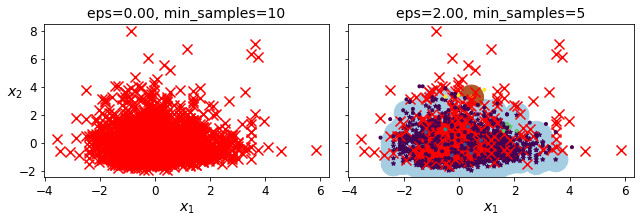

In [18]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X_trainWhite, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X_trainWhite, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()

In [19]:
dbscan = dbscan2

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [22]:
X_new = X_testWhite
knn.predict(X_new)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
knn.predict_proba(X_new)

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [99]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.5] = -1
y_pred.ravel()

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1,
       -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

### Comparing Models

In [31]:
y_trainWhite = y_trainWhite.to_numpy()

In [78]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

categorical_names_white = wineWhite["Categorical Quality"].unique()

report_DT_E = []
report_DT_G = []
report_KNN = []
report_NB = []
report_NN = []

report_DT_E_Train = []
report_DT_G_Train = []
report_KNN_Train = []
report_NB_Train = []
report_NN_Train = []

accuracy_DT_E = []
accuracy_DT_G = []
accuracy_KNN = []
accuracy_NB = []
accuracy_NN = []

accuracy_DT_E_Train = []
accuracy_DT_G_Train = []
accuracy_KNN_Train = []
accuracy_NB_Train = []
accuracy_NN_Train = []


AverageTesting = []
AverageUnit = []

# AverageTraining = []
# AverageUnitTraining = []

kf = KFold(n_splits=10, random_state=None, shuffle=True)

i = 0
for train_index, test_index in kf.split(X_trainWhite):

    X_train, X_test_val = X_trainWhite[train_index], X_trainWhite[test_index]
    y_train, y_test_val = y_trainWhite[train_index], y_trainWhite[test_index]
    
    DT_Entropy_Clf = decisionTree_(X_train, X_test_val, y_train, y_test_val, "entropy", 3)
    DT_Gini_Clf = decisionTree_(X_train, X_test_val, y_train, y_test_val, "gini", 3)
    KNN_Clf = KNNClassifier(X_train, X_test_val, y_train, y_test_val, 50)
    NB_Clf = NaiveBayesClassifier(X_train, X_test_val, y_train, y_test_val)
    NN_Clf = NeuralNetworkClassifier(X_train, X_test_val, y_train, y_test_val)
    
    y_predict_DT_E = DT_Entropy_Clf.predict(X_test_val)
    y_predict_DT_G = DT_Entropy_Clf.predict(X_test_val)
    y_predict_KNN = KNN_Clf.predict(X_test_val)
    y_predict_NB = NB_Clf.predict(X_test_val)
    y_predict_NN = NN_Clf.predict(X_test_val)
    
    y_predict_DT_E_Train = DT_Entropy_Clf.predict(X_train)
    y_predict_DT_G_Train = DT_Entropy_Clf.predict(X_train)
    y_predict_KNN_Train = KNN_Clf.predict(X_train)
    y_predict_NB_Train = NB_Clf.predict(X_train)
    y_predict_NN_Train = NN_Clf.predict(X_train)
    
    report_DT_E.append(classification_report(y_test_val, y_predict_DT_E, output_dict=True))
    report_DT_G.append(classification_report(y_test_val, y_predict_DT_G, output_dict=True))
    report_KNN.append(classification_report(y_test_val, y_predict_KNN, output_dict=True))    
    report_NB.append(classification_report(y_test_val, y_predict_NB, output_dict=True))
    AverageTesting.append(NN_Clf.evaluate(X_test_val, y_test_val,verbose=1))
    AverageUnit.append(Average(NN_Clf.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1).history['accuracy']))
    
    report_DT_E_Train.append(classification_report(y_train, y_predict_DT_E_Train, output_dict=True))
    report_DT_G_Train.append(classification_report(y_train, y_predict_DT_G_Train, output_dict=True))
    report_KNN_Train.append(classification_report(y_train, y_predict_KNN_Train, output_dict=True))    
    report_NB_Train.append(classification_report(y_train, y_predict_NB_Train, output_dict=True))
#     AverageTraining.append(NN_Clf.evaluate(X_train, y_test_val,verbose=1))
#     AverageUnitTraining.append(Average(NN_Clf.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1).history['accuracy']))
      
    accuracy_DT_E.append(report_DT_E[i]["accuracy"])
    accuracy_DT_G.append(report_DT_G[i]["accuracy"])
    accuracy_KNN.append(report_KNN[i]["accuracy"])
    accuracy_NB.append(report_NB[i]["accuracy"])
    
    accuracy_DT_E_Train.append(report_DT_E_Train[i]["accuracy"])
    accuracy_DT_G_Train.append(report_DT_G_Train[i]["accuracy"])
    accuracy_KNN_Train.append(report_KNN_Train[i]["accuracy"])
    accuracy_NB_Train.append(report_NB_Train[i]["accuracy"])
    
    i = i + 1
    

Train on 2851 samples
Epoch 1/100
2851/2851 [==============================] - 2s 556us/sample - loss: 0.5695 - accuracy: 0.6959
Epoch 2/100
2851/2851 [==============================] - 1s 177us/sample - loss: 0.5024 - accuracy: 0.7492
Epoch 3/100
2851/2851 [==============================] - 1s 197us/sample - loss: 0.4930 - accuracy: 0.7545
Epoch 4/100
2851/2851 [==============================] - 1s 187us/sample - loss: 0.4897 - accuracy: 0.7590
Epoch 5/100
2851/2851 [==============================] - 1s 197us/sample - loss: 0.4879 - accuracy: 0.7594
Epoch 6/100
2851/2851 [==============================] - 1s 180us/sample - loss: 0.4865 - accuracy: 0.7594
Epoch 7/100
2851/2851 [==============================] - 0s 173us/sample - loss: 0.4845 - accuracy: 0.7622
Epoch 8/100
2851/2851 [==============================] - 0s 175us/sample - loss: 0.4829 - accuracy: 0.7650
Epoch 9/100
2851/2851 [==============================] - 0s 156us/sample - loss: 0.4811 - accuracy: 0.7650
Epoch 10/100
28

2851/2851 [==============================] - 0s 159us/sample - loss: 0.4314 - accuracy: 0.7983
Epoch 77/100
2851/2851 [==============================] - 0s 156us/sample - loss: 0.4314 - accuracy: 0.7994
Epoch 78/100
2851/2851 [==============================] - 0s 156us/sample - loss: 0.4308 - accuracy: 0.8001
Epoch 79/100
2851/2851 [==============================] - 0s 156us/sample - loss: 0.4307 - accuracy: 0.8015
Epoch 80/100
2851/2851 [==============================] - 0s 160us/sample - loss: 0.4301 - accuracy: 0.7997
Epoch 81/100
2851/2851 [==============================] - 0s 159us/sample - loss: 0.4301 - accuracy: 0.8001
Epoch 82/100
2851/2851 [==============================] - 0s 160us/sample - loss: 0.4291 - accuracy: 0.7987
Epoch 83/100
2851/2851 [==============================] - 0s 157us/sample - loss: 0.4286 - accuracy: 0.8039
Epoch 84/100
2851/2851 [==============================] - 0s 153us/sample - loss: 0.4290 - accuracy: 0.7983
Epoch 85/100
2851/2851 [=================

317/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 2851 samples
Epoch 1/100
2851/2851 [==============================] - 0s 167us/sample - loss: 0.4233 - accuracy: 0.8018
Epoch 2/100
2851/2851 [==============================] - 0s 153us/sample - loss: 0.4224 - accuracy: 0.8043
Epoch 3/100
2851/2851 [==============================] - 0s 154us/sample - loss: 0.4228 - accuracy: 0.8039
Epoch 4/100
2851/2851 [==============================] - 0s 159us/sample - loss: 0.4217 - accuracy: 0.8071
Epoch 5/100
2851/2851 [==============================] - 0s 155us/sample - loss: 0.4216 - accuracy: 0.8057
Epoch 6/100
2851/2851 [==============================] - 0s 160us/sample - loss: 0.4208 - accuracy: 0.8050
Epoch 7/100
2851/2851 [==============================] - 0s 159us/sample - loss: 0.4214 - accuracy: 0.8060
Epoch 8/100
2851/2851 [==============================] - 0s 156us/sample - loss: 0.4203 - accuracy: 0.8060
Epoch 9/100
2851/2851 [==============================] - 0s 161us/sample - loss: 0.4205 - accuracy: 0.8095
Epoch 10/100
28

2851/2851 [==============================] - 0s 152us/sample - loss: 0.4062 - accuracy: 0.8141
Epoch 77/100
2851/2851 [==============================] - 0s 156us/sample - loss: 0.4060 - accuracy: 0.8169
Epoch 78/100
2851/2851 [==============================] - 0s 153us/sample - loss: 0.4055 - accuracy: 0.8137
Epoch 79/100
2851/2851 [==============================] - 0s 155us/sample - loss: 0.4053 - accuracy: 0.8145
Epoch 80/100
2851/2851 [==============================] - 0s 154us/sample - loss: 0.4053 - accuracy: 0.8145
Epoch 81/100
2851/2851 [==============================] - 0s 149us/sample - loss: 0.4052 - accuracy: 0.8159
Epoch 82/100
2851/2851 [==============================] - 0s 157us/sample - loss: 0.4045 - accuracy: 0.8190
Epoch 83/100
2851/2851 [==============================] - 0s 152us/sample - loss: 0.4046 - accuracy: 0.8148
Epoch 84/100
2851/2851 [==============================] - 0s 155us/sample - loss: 0.4042 - accuracy: 0.8137
Epoch 85/100
2851/2851 [=================

2851/2851 [==============================] - 0s 157us/sample - loss: 0.4452 - accuracy: 0.7888
Epoch 52/100
2851/2851 [==============================] - 0s 153us/sample - loss: 0.4450 - accuracy: 0.7910
Epoch 53/100
2851/2851 [==============================] - 0s 152us/sample - loss: 0.4442 - accuracy: 0.7902
Epoch 54/100
2851/2851 [==============================] - 0s 156us/sample - loss: 0.4437 - accuracy: 0.7920
Epoch 55/100
2851/2851 [==============================] - 0s 153us/sample - loss: 0.4428 - accuracy: 0.7913
Epoch 56/100
2851/2851 [==============================] - 0s 154us/sample - loss: 0.4422 - accuracy: 0.7952
Epoch 57/100
2851/2851 [==============================] - 0s 157us/sample - loss: 0.4415 - accuracy: 0.7920
Epoch 58/100
2851/2851 [==============================] - 0s 152us/sample - loss: 0.4416 - accuracy: 0.7902
Epoch 59/100
2851/2851 [==============================] - 0s 152us/sample - loss: 0.4413 - accuracy: 0.7931
Epoch 60/100
2851/2851 [=================

317/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 2851 samples
Epoch 1/100
2851/2851 [==============================] - 0s 158us/sample - loss: 0.4227 - accuracy: 0.7966
Epoch 2/100
2851/2851 [==============================] - 0s 153us/sample - loss: 0.4229 - accuracy: 0.8057
Epoch 3/100
2851/2851 [==============================] - 0s 151us/sample - loss: 0.4228 - accuracy: 0.8032
Epoch 4/100
2851/2851 [==============================] - 0s 149us/sample - loss: 0.4223 - accuracy: 0.8036
Epoch 5/100
2851/2851 [==============================] - 0s 153us/sample - loss: 0.4222 - accuracy: 0.8032
Epoch 6/100
2851/2851 [==============================] - 0s 152us/sample - loss: 0.4219 - accuracy: 0.8074
Epoch 7/100
2851/2851 [==============================] - 0s 161us/sample - loss: 0.4212 - accuracy: 0.8043
Epoch 8/100
2851/2851 [==============================] - 0s 156us/sample - loss: 0.4219 - accuracy: 0.8050
Epoch 9/100
2851/2851 [==============================] - 0s 153us/sample - loss: 0.4218 - accuracy: 0.8053
Epoch 10/100
28

2851/2851 [==============================] - 0s 151us/sample - loss: 0.4114 - accuracy: 0.8074
Epoch 77/100
2851/2851 [==============================] - 0s 154us/sample - loss: 0.4113 - accuracy: 0.8081
Epoch 78/100
2851/2851 [==============================] - 0s 155us/sample - loss: 0.4118 - accuracy: 0.8095
Epoch 79/100
2851/2851 [==============================] - 0s 158us/sample - loss: 0.4111 - accuracy: 0.8064
Epoch 80/100
2851/2851 [==============================] - 0s 154us/sample - loss: 0.4107 - accuracy: 0.8078
Epoch 81/100
2851/2851 [==============================] - 0s 151us/sample - loss: 0.4118 - accuracy: 0.8078
Epoch 82/100
2851/2851 [==============================] - 0s 150us/sample - loss: 0.4106 - accuracy: 0.8060
Epoch 83/100
2851/2851 [==============================] - 0s 152us/sample - loss: 0.4103 - accuracy: 0.8060
Epoch 84/100
2851/2851 [==============================] - 0s 146us/sample - loss: 0.4105 - accuracy: 0.8099
Epoch 85/100
2851/2851 [=================

2851/2851 [==============================] - 0s 164us/sample - loss: 0.4442 - accuracy: 0.7969
Epoch 52/100
2851/2851 [==============================] - 1s 180us/sample - loss: 0.4444 - accuracy: 0.7997
Epoch 53/100
2851/2851 [==============================] - 0s 158us/sample - loss: 0.4440 - accuracy: 0.8004
Epoch 54/100
2851/2851 [==============================] - 0s 144us/sample - loss: 0.4428 - accuracy: 0.8004
Epoch 55/100
2851/2851 [==============================] - 0s 148us/sample - loss: 0.4426 - accuracy: 0.7955
Epoch 56/100
2851/2851 [==============================] - 0s 144us/sample - loss: 0.4422 - accuracy: 0.7994
Epoch 57/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4412 - accuracy: 0.7990
Epoch 58/100
2851/2851 [==============================] - 0s 143us/sample - loss: 0.4412 - accuracy: 0.7987
Epoch 59/100
2851/2851 [==============================] - 0s 148us/sample - loss: 0.4398 - accuracy: 0.8008
Epoch 60/100
2851/2851 [=================

317/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 2851 samples
Epoch 1/100
2851/2851 [==============================] - 0s 158us/sample - loss: 0.4252 - accuracy: 0.8081
Epoch 2/100
2851/2851 [==============================] - 0s 144us/sample - loss: 0.4249 - accuracy: 0.8025
Epoch 3/100
2851/2851 [==============================] - 0s 153us/sample - loss: 0.4253 - accuracy: 0.8039
Epoch 4/100
2851/2851 [==============================] - 0s 148us/sample - loss: 0.4247 - accuracy: 0.8060
Epoch 5/100
2851/2851 [==============================] - 0s 149us/sample - loss: 0.4244 - accuracy: 0.8046
Epoch 6/100
2851/2851 [==============================] - 0s 149us/sample - loss: 0.4245 - accuracy: 0.8053
Epoch 7/100
2851/2851 [==============================] - 0s 150us/sample - loss: 0.4242 - accuracy: 0.8043
Epoch 8/100
2851/2851 [==============================] - 0s 149us/sample - loss: 0.4240 - accuracy: 0.8036
Epoch 9/100
2851/2851 [==============================] - 0s 150us/sample - loss: 0.4240 - accuracy: 0.8043
Epoch 10/100
28

2851/2851 [==============================] - 0s 146us/sample - loss: 0.4131 - accuracy: 0.8148
Epoch 77/100
2851/2851 [==============================] - 0s 145us/sample - loss: 0.4136 - accuracy: 0.8137
Epoch 78/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4126 - accuracy: 0.8113
Epoch 79/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4130 - accuracy: 0.8088
Epoch 80/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4136 - accuracy: 0.8113
Epoch 81/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4129 - accuracy: 0.8120
Epoch 82/100
2851/2851 [==============================] - 0s 146us/sample - loss: 0.4127 - accuracy: 0.8085
Epoch 83/100
2851/2851 [==============================] - 0s 165us/sample - loss: 0.4124 - accuracy: 0.8106
Epoch 84/100
2851/2851 [==============================] - 0s 150us/sample - loss: 0.4126 - accuracy: 0.8109
Epoch 85/100
2851/2851 [=================

2851/2851 [==============================] - 0s 148us/sample - loss: 0.4456 - accuracy: 0.7959
Epoch 52/100
2851/2851 [==============================] - 0s 148us/sample - loss: 0.4455 - accuracy: 0.7959
Epoch 53/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4454 - accuracy: 0.7938
Epoch 54/100
2851/2851 [==============================] - 0s 146us/sample - loss: 0.4451 - accuracy: 0.7976
Epoch 55/100
2851/2851 [==============================] - 0s 145us/sample - loss: 0.4446 - accuracy: 0.7969
Epoch 56/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4441 - accuracy: 0.7962
Epoch 57/100
2851/2851 [==============================] - 0s 146us/sample - loss: 0.4436 - accuracy: 0.7980
Epoch 58/100
2851/2851 [==============================] - 0s 148us/sample - loss: 0.4434 - accuracy: 0.7941
Epoch 59/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4424 - accuracy: 0.7902
Epoch 60/100
2851/2851 [=================

317/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 2851 samples
Epoch 1/100
2851/2851 [==============================] - 0s 155us/sample - loss: 0.4317 - accuracy: 0.7997
Epoch 2/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4311 - accuracy: 0.7976
Epoch 3/100
2851/2851 [==============================] - 0s 145us/sample - loss: 0.4301 - accuracy: 0.8004
Epoch 4/100
2851/2851 [==============================] - 0s 146us/sample - loss: 0.4297 - accuracy: 0.7983
Epoch 5/100
2851/2851 [==============================] - 0s 146us/sample - loss: 0.4303 - accuracy: 0.7987
Epoch 6/100
2851/2851 [==============================] - 0s 145us/sample - loss: 0.4293 - accuracy: 0.8011
Epoch 7/100
2851/2851 [==============================] - 0s 144us/sample - loss: 0.4293 - accuracy: 0.8001
Epoch 8/100
2851/2851 [==============================] - 0s 145us/sample - loss: 0.4292 - accuracy: 0.7983
Epoch 9/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4287 - accuracy: 0.8008
Epoch 10/100
28

2851/2851 [==============================] - 0s 160us/sample - loss: 0.4182 - accuracy: 0.8043
Epoch 77/100
2851/2851 [==============================] - 0s 154us/sample - loss: 0.4178 - accuracy: 0.8074
Epoch 78/100
2851/2851 [==============================] - 0s 150us/sample - loss: 0.4182 - accuracy: 0.8043
Epoch 79/100
2851/2851 [==============================] - 1s 187us/sample - loss: 0.4179 - accuracy: 0.8039
Epoch 80/100
2851/2851 [==============================] - 0s 161us/sample - loss: 0.4175 - accuracy: 0.8067
Epoch 81/100
2851/2851 [==============================] - 0s 154us/sample - loss: 0.4171 - accuracy: 0.8039
Epoch 82/100
2851/2851 [==============================] - 0s 153us/sample - loss: 0.4179 - accuracy: 0.8060
Epoch 83/100
2851/2851 [==============================] - 0s 148us/sample - loss: 0.4182 - accuracy: 0.8067
Epoch 84/100
2851/2851 [==============================] - 0s 152us/sample - loss: 0.4170 - accuracy: 0.8043
Epoch 85/100
2851/2851 [=================

2851/2851 [==============================] - 0s 148us/sample - loss: 0.4380 - accuracy: 0.7966
Epoch 52/100
2851/2851 [==============================] - 0s 150us/sample - loss: 0.4372 - accuracy: 0.7955
Epoch 53/100
2851/2851 [==============================] - 0s 149us/sample - loss: 0.4366 - accuracy: 0.7948
Epoch 54/100
2851/2851 [==============================] - 0s 145us/sample - loss: 0.4358 - accuracy: 0.8001
Epoch 55/100
2851/2851 [==============================] - 0s 148us/sample - loss: 0.4347 - accuracy: 0.7976
Epoch 56/100
2851/2851 [==============================] - 0s 148us/sample - loss: 0.4341 - accuracy: 0.7966
Epoch 57/100
2851/2851 [==============================] - 0s 146us/sample - loss: 0.4338 - accuracy: 0.7980
Epoch 58/100
2851/2851 [==============================] - 0s 162us/sample - loss: 0.4332 - accuracy: 0.7962
Epoch 59/100
2851/2851 [==============================] - 0s 149us/sample - loss: 0.4321 - accuracy: 0.7966
Epoch 60/100
2851/2851 [=================

317/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 2851 samples
Epoch 1/100
2851/2851 [==============================] - 0s 161us/sample - loss: 0.4121 - accuracy: 0.8106
Epoch 2/100
2851/2851 [==============================] - 0s 148us/sample - loss: 0.4119 - accuracy: 0.8088
Epoch 3/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4119 - accuracy: 0.8099
Epoch 4/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4118 - accuracy: 0.8116
Epoch 5/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4104 - accuracy: 0.8127
Epoch 6/100
2851/2851 [==============================] - 0s 148us/sample - loss: 0.4106 - accuracy: 0.8071
Epoch 7/100
2851/2851 [==============================] - 0s 149us/sample - loss: 0.4106 - accuracy: 0.8095
Epoch 8/100
2851/2851 [==============================] - 0s 148us/sample - loss: 0.4098 - accuracy: 0.8127
Epoch 9/100
2851/2851 [==============================] - 0s 148us/sample - loss: 0.4103 - accuracy: 0.8137
Epoch 10/100
28

2851/2851 [==============================] - 0s 147us/sample - loss: 0.3970 - accuracy: 0.8152
Epoch 77/100
2851/2851 [==============================] - 0s 148us/sample - loss: 0.3970 - accuracy: 0.8176
Epoch 78/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.3964 - accuracy: 0.8134
Epoch 79/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.3961 - accuracy: 0.8152
Epoch 80/100
2851/2851 [==============================] - 0s 144us/sample - loss: 0.3965 - accuracy: 0.8152
Epoch 81/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.3957 - accuracy: 0.8159
Epoch 82/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.3957 - accuracy: 0.8148
Epoch 83/100
2851/2851 [==============================] - 0s 148us/sample - loss: 0.3961 - accuracy: 0.8166
Epoch 84/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.3955 - accuracy: 0.8152
Epoch 85/100
2851/2851 [=================

2851/2851 [==============================] - 0s 152us/sample - loss: 0.4476 - accuracy: 0.7941
Epoch 52/100
2851/2851 [==============================] - 0s 153us/sample - loss: 0.4473 - accuracy: 0.7948
Epoch 53/100
2851/2851 [==============================] - 0s 156us/sample - loss: 0.4467 - accuracy: 0.7934
Epoch 54/100
2851/2851 [==============================] - 0s 153us/sample - loss: 0.4468 - accuracy: 0.7948
Epoch 55/100
2851/2851 [==============================] - 0s 159us/sample - loss: 0.4460 - accuracy: 0.7983
Epoch 56/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4455 - accuracy: 0.7962
Epoch 57/100
2851/2851 [==============================] - 0s 155us/sample - loss: 0.4447 - accuracy: 0.7962
Epoch 58/100
2851/2851 [==============================] - 0s 154us/sample - loss: 0.4455 - accuracy: 0.7959
Epoch 59/100
2851/2851 [==============================] - 0s 156us/sample - loss: 0.4443 - accuracy: 0.7945
Epoch 60/100
2851/2851 [=================

317/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 2851 samples
Epoch 1/100
2851/2851 [==============================] - 1s 176us/sample - loss: 0.4296 - accuracy: 0.8015
Epoch 2/100
2851/2851 [==============================] - 0s 156us/sample - loss: 0.4299 - accuracy: 0.7952
Epoch 3/100
2851/2851 [==============================] - 0s 155us/sample - loss: 0.4304 - accuracy: 0.7952
Epoch 4/100
2851/2851 [==============================] - 0s 158us/sample - loss: 0.4299 - accuracy: 0.7973
Epoch 5/100
2851/2851 [==============================] - 0s 145us/sample - loss: 0.4288 - accuracy: 0.7924
Epoch 6/100
2851/2851 [==============================] - 0s 150us/sample - loss: 0.4289 - accuracy: 0.8001
Epoch 7/100
2851/2851 [==============================] - 0s 156us/sample - loss: 0.4287 - accuracy: 0.7973
Epoch 8/100
2851/2851 [==============================] - 0s 152us/sample - loss: 0.4290 - accuracy: 0.7955
Epoch 9/100
2851/2851 [==============================] - 0s 145us/sample - loss: 0.4281 - accuracy: 0.8008
Epoch 10/100
28

2851/2851 [==============================] - 0s 149us/sample - loss: 0.4184 - accuracy: 0.8011
Epoch 77/100
2851/2851 [==============================] - 0s 151us/sample - loss: 0.4180 - accuracy: 0.8018
Epoch 78/100
2851/2851 [==============================] - 0s 145us/sample - loss: 0.4182 - accuracy: 0.8001
Epoch 79/100
2851/2851 [==============================] - 0s 149us/sample - loss: 0.4179 - accuracy: 0.8022
Epoch 80/100
2851/2851 [==============================] - 0s 146us/sample - loss: 0.4185 - accuracy: 0.8022
Epoch 81/100
2851/2851 [==============================] - 0s 146us/sample - loss: 0.4179 - accuracy: 0.8036
Epoch 82/100
2851/2851 [==============================] - 0s 146us/sample - loss: 0.4180 - accuracy: 0.8036
Epoch 83/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4177 - accuracy: 0.8060
Epoch 84/100
2851/2851 [==============================] - 0s 150us/sample - loss: 0.4180 - accuracy: 0.8057
Epoch 85/100
2851/2851 [=================

2851/2851 [==============================] - 0s 146us/sample - loss: 0.4466 - accuracy: 0.7941
Epoch 52/100
2851/2851 [==============================] - 0s 140us/sample - loss: 0.4470 - accuracy: 0.7952
Epoch 53/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4448 - accuracy: 0.7945
Epoch 54/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4453 - accuracy: 0.7910
Epoch 55/100
2851/2851 [==============================] - 0s 152us/sample - loss: 0.4451 - accuracy: 0.7941
Epoch 56/100
2851/2851 [==============================] - 0s 153us/sample - loss: 0.4437 - accuracy: 0.7906
Epoch 57/100
2851/2851 [==============================] - 0s 152us/sample - loss: 0.4440 - accuracy: 0.7952
Epoch 58/100
2851/2851 [==============================] - 0s 144us/sample - loss: 0.4431 - accuracy: 0.7910
Epoch 59/100
2851/2851 [==============================] - 0s 145us/sample - loss: 0.4435 - accuracy: 0.7941
Epoch 60/100
2851/2851 [=================

317/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 2851 samples
Epoch 1/100
2851/2851 [==============================] - 0s 159us/sample - loss: 0.4257 - accuracy: 0.7987
Epoch 2/100
2851/2851 [==============================] - 0s 154us/sample - loss: 0.4242 - accuracy: 0.7994
Epoch 3/100
2851/2851 [==============================] - 0s 155us/sample - loss: 0.4246 - accuracy: 0.7987
Epoch 4/100
2851/2851 [==============================] - 0s 145us/sample - loss: 0.4240 - accuracy: 0.8025
Epoch 5/100
2851/2851 [==============================] - 0s 154us/sample - loss: 0.4248 - accuracy: 0.8004
Epoch 6/100
2851/2851 [==============================] - 0s 146us/sample - loss: 0.4235 - accuracy: 0.7980
Epoch 7/100
2851/2851 [==============================] - 0s 156us/sample - loss: 0.4237 - accuracy: 0.7987
Epoch 8/100
2851/2851 [==============================] - 0s 144us/sample - loss: 0.4233 - accuracy: 0.8025
Epoch 9/100
2851/2851 [==============================] - 0s 150us/sample - loss: 0.4226 - accuracy: 0.7980
Epoch 10/100
28

2851/2851 [==============================] - 0s 148us/sample - loss: 0.4061 - accuracy: 0.8116
Epoch 77/100
2851/2851 [==============================] - 0s 150us/sample - loss: 0.4064 - accuracy: 0.8145
Epoch 78/100
2851/2851 [==============================] - 0s 145us/sample - loss: 0.4067 - accuracy: 0.8155
Epoch 79/100
2851/2851 [==============================] - 0s 149us/sample - loss: 0.4066 - accuracy: 0.8113
Epoch 80/100
2851/2851 [==============================] - 0s 149us/sample - loss: 0.4059 - accuracy: 0.8116
Epoch 81/100
2851/2851 [==============================] - 0s 149us/sample - loss: 0.4063 - accuracy: 0.8127
Epoch 82/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4049 - accuracy: 0.8113
Epoch 83/100
2851/2851 [==============================] - 0s 148us/sample - loss: 0.4057 - accuracy: 0.8123
Epoch 84/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4058 - accuracy: 0.8155
Epoch 85/100
2851/2851 [=================

2851/2851 [==============================] - 0s 147us/sample - loss: 0.4449 - accuracy: 0.7888
Epoch 52/100
2851/2851 [==============================] - 0s 152us/sample - loss: 0.4446 - accuracy: 0.7899
Epoch 53/100
2851/2851 [==============================] - 0s 150us/sample - loss: 0.4434 - accuracy: 0.7902
Epoch 54/100
2851/2851 [==============================] - 0s 146us/sample - loss: 0.4433 - accuracy: 0.7906
Epoch 55/100
2851/2851 [==============================] - 0s 145us/sample - loss: 0.4420 - accuracy: 0.7902
Epoch 56/100
2851/2851 [==============================] - 0s 149us/sample - loss: 0.4415 - accuracy: 0.7917
Epoch 57/100
2851/2851 [==============================] - 0s 149us/sample - loss: 0.4401 - accuracy: 0.7913
Epoch 58/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4401 - accuracy: 0.7917
Epoch 59/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4394 - accuracy: 0.7959
Epoch 60/100
2851/2851 [=================

317/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 2851 samples
Epoch 1/100
2851/2851 [==============================] - 0s 163us/sample - loss: 0.4213 - accuracy: 0.8053
Epoch 2/100
2851/2851 [==============================] - 0s 146us/sample - loss: 0.4216 - accuracy: 0.8092
Epoch 3/100
2851/2851 [==============================] - 0s 145us/sample - loss: 0.4214 - accuracy: 0.8046
Epoch 4/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4210 - accuracy: 0.8039
Epoch 5/100
2851/2851 [==============================] - 0s 146us/sample - loss: 0.4213 - accuracy: 0.8029
Epoch 6/100
2851/2851 [==============================] - 0s 142us/sample - loss: 0.4201 - accuracy: 0.8057
Epoch 7/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4209 - accuracy: 0.8043
Epoch 8/100
2851/2851 [==============================] - 0s 150us/sample - loss: 0.4205 - accuracy: 0.8081
Epoch 9/100
2851/2851 [==============================] - 0s 155us/sample - loss: 0.4196 - accuracy: 0.8043
Epoch 10/100
28

2851/2851 [==============================] - 0s 140us/sample - loss: 0.4074 - accuracy: 0.8159
Epoch 77/100
2851/2851 [==============================] - 0s 144us/sample - loss: 0.4070 - accuracy: 0.8148
Epoch 78/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4065 - accuracy: 0.8173
Epoch 79/100
2851/2851 [==============================] - 0s 145us/sample - loss: 0.4072 - accuracy: 0.8145
Epoch 80/100
2851/2851 [==============================] - 0s 143us/sample - loss: 0.4064 - accuracy: 0.8141
Epoch 81/100
2851/2851 [==============================] - 0s 154us/sample - loss: 0.4058 - accuracy: 0.8148
Epoch 82/100
2851/2851 [==============================] - 0s 147us/sample - loss: 0.4064 - accuracy: 0.8155
Epoch 83/100
2851/2851 [==============================] - 0s 149us/sample - loss: 0.4060 - accuracy: 0.8169
Epoch 84/100
2851/2851 [==============================] - 0s 152us/sample - loss: 0.4061 - accuracy: 0.8134
Epoch 85/100
2851/2851 [=================

2852/2852 [==============================] - 0s 153us/sample - loss: 0.4524 - accuracy: 0.7917
Epoch 52/100
2852/2852 [==============================] - 0s 147us/sample - loss: 0.4515 - accuracy: 0.7931
Epoch 53/100
2852/2852 [==============================] - 0s 151us/sample - loss: 0.4516 - accuracy: 0.7931
Epoch 54/100
2852/2852 [==============================] - 0s 145us/sample - loss: 0.4507 - accuracy: 0.7928
Epoch 55/100
2852/2852 [==============================] - 0s 153us/sample - loss: 0.4501 - accuracy: 0.7970
Epoch 56/100
2852/2852 [==============================] - 0s 169us/sample - loss: 0.4497 - accuracy: 0.7945
Epoch 57/100
2852/2852 [==============================] - 0s 165us/sample - loss: 0.4492 - accuracy: 0.7963
Epoch 58/100
2852/2852 [==============================] - 0s 166us/sample - loss: 0.4489 - accuracy: 0.7994
Epoch 59/100
2852/2852 [==============================] - 0s 156us/sample - loss: 0.4473 - accuracy: 0.7966
Epoch 60/100
2852/2852 [=================

316/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 2852 samples
Epoch 1/100
2852/2852 [==============================] - 0s 158us/sample - loss: 0.4323 - accuracy: 0.8026
Epoch 2/100
2852/2852 [==============================] - 0s 147us/sample - loss: 0.4310 - accuracy: 0.8036
Epoch 3/100
2852/2852 [==============================] - 0s 146us/sample - loss: 0.4315 - accuracy: 0.8033
Epoch 4/100
2852/2852 [==============================] - 0s 147us/sample - loss: 0.4312 - accuracy: 0.7987
Epoch 5/100
2852/2852 [==============================] - 0s 147us/sample - loss: 0.4311 - accuracy: 0.8040
Epoch 6/100
2852/2852 [==============================] - 0s 146us/sample - loss: 0.4310 - accuracy: 0.8019
Epoch 7/100
2852/2852 [==============================] - 0s 148us/sample - loss: 0.4305 - accuracy: 0.8012
Epoch 8/100
2852/2852 [==============================] - 0s 147us/sample - loss: 0.4306 - accuracy: 0.8019
Epoch 9/100
2852/2852 [==============================] - 0s 145us/sample - loss: 0.4302 - accuracy: 0.8019
Epoch 10/100
28

2852/2852 [==============================] - 0s 146us/sample - loss: 0.4141 - accuracy: 0.8124
Epoch 77/100
2852/2852 [==============================] - 0s 146us/sample - loss: 0.4138 - accuracy: 0.8058
Epoch 78/100
2852/2852 [==============================] - 0s 148us/sample - loss: 0.4136 - accuracy: 0.8068
Epoch 79/100
2852/2852 [==============================] - 0s 144us/sample - loss: 0.4136 - accuracy: 0.8072
Epoch 80/100
2852/2852 [==============================] - 0s 146us/sample - loss: 0.4134 - accuracy: 0.8086
Epoch 81/100
2852/2852 [==============================] - 0s 143us/sample - loss: 0.4138 - accuracy: 0.8072
Epoch 82/100
2852/2852 [==============================] - 0s 145us/sample - loss: 0.4131 - accuracy: 0.8043
Epoch 83/100
2852/2852 [==============================] - 0s 146us/sample - loss: 0.4124 - accuracy: 0.8061
Epoch 84/100
2852/2852 [==============================] - 0s 145us/sample - loss: 0.4130 - accuracy: 0.8086
Epoch 85/100
2852/2852 [=================

2852/2852 [==============================] - 0s 143us/sample - loss: 0.4521 - accuracy: 0.7889
Epoch 52/100
2852/2852 [==============================] - 0s 141us/sample - loss: 0.4523 - accuracy: 0.7917
Epoch 53/100
2852/2852 [==============================] - 0s 146us/sample - loss: 0.4511 - accuracy: 0.7900
Epoch 54/100
2852/2852 [==============================] - 0s 146us/sample - loss: 0.4517 - accuracy: 0.7896
Epoch 55/100
2852/2852 [==============================] - 0s 143us/sample - loss: 0.4509 - accuracy: 0.7917
Epoch 56/100
2852/2852 [==============================] - 0s 142us/sample - loss: 0.4497 - accuracy: 0.7889
Epoch 57/100
2852/2852 [==============================] - 0s 144us/sample - loss: 0.4500 - accuracy: 0.7882
Epoch 58/100
2852/2852 [==============================] - 0s 143us/sample - loss: 0.4498 - accuracy: 0.7889
Epoch 59/100
2852/2852 [==============================] - 0s 144us/sample - loss: 0.4488 - accuracy: 0.7893
Epoch 60/100
2852/2852 [=================

316/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 2852 samples
Epoch 1/100
2852/2852 [==============================] - 0s 158us/sample - loss: 0.4345 - accuracy: 0.7994
Epoch 2/100
2852/2852 [==============================] - 0s 145us/sample - loss: 0.4339 - accuracy: 0.7987
Epoch 3/100
2852/2852 [==============================] - 0s 145us/sample - loss: 0.4334 - accuracy: 0.7994
Epoch 4/100
2852/2852 [==============================] - 0s 145us/sample - loss: 0.4331 - accuracy: 0.8019
Epoch 5/100
2852/2852 [==============================] - 0s 144us/sample - loss: 0.4330 - accuracy: 0.8005
Epoch 6/100
2852/2852 [==============================] - 0s 145us/sample - loss: 0.4327 - accuracy: 0.8001
Epoch 7/100
2852/2852 [==============================] - 0s 146us/sample - loss: 0.4321 - accuracy: 0.8008
Epoch 8/100
2852/2852 [==============================] - 0s 145us/sample - loss: 0.4322 - accuracy: 0.7991
Epoch 9/100
2852/2852 [==============================] - 0s 144us/sample - loss: 0.4315 - accuracy: 0.8043
Epoch 10/100
28

2852/2852 [==============================] - 0s 145us/sample - loss: 0.4200 - accuracy: 0.8061
Epoch 77/100
2852/2852 [==============================] - 0s 144us/sample - loss: 0.4199 - accuracy: 0.8043
Epoch 78/100
2852/2852 [==============================] - 0s 144us/sample - loss: 0.4198 - accuracy: 0.8047
Epoch 79/100
2852/2852 [==============================] - 0s 143us/sample - loss: 0.4201 - accuracy: 0.8040
Epoch 80/100
2852/2852 [==============================] - 0s 144us/sample - loss: 0.4199 - accuracy: 0.8082
Epoch 81/100
2852/2852 [==============================] - 0s 144us/sample - loss: 0.4189 - accuracy: 0.8096
Epoch 82/100
2852/2852 [==============================] - 0s 144us/sample - loss: 0.4196 - accuracy: 0.8033
Epoch 83/100
2852/2852 [==============================] - 0s 145us/sample - loss: 0.4196 - accuracy: 0.8065
Epoch 84/100
2852/2852 [==============================] - 0s 143us/sample - loss: 0.4193 - accuracy: 0.8061
Epoch 85/100
2852/2852 [=================

In [83]:
#Neural Network Test
accuracies = []
for loss, accuracy in AverageTesting:
    accuracies.append(accuracy)
Average_accuracy = Average(accuracies)
print(Average_accuracy)

0.7575959205627442


In [84]:
#Neural Network Train
units = []
for unit in AverageUnit:
    units.append(unit)
Average_unit = Average(units)
print(Average_unit)

0.8075507088899613


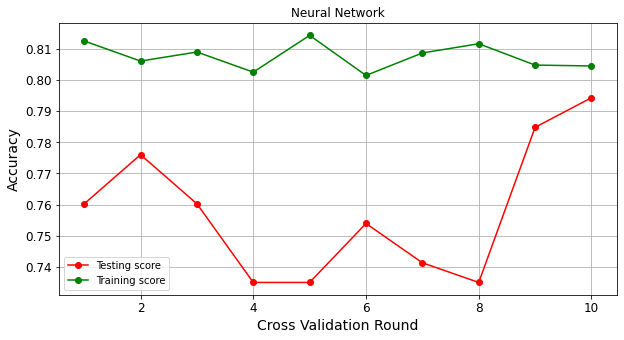

In [85]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Neural Network')
ax.set_xlabel("Cross Validation Round")
ax.set_ylabel("Accuracy")
ax.grid()

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

ax.plot(x, accuracies, 'o-', color="r", label="Testing score")
ax.plot(x, units, 'o-', color="g", label="Training score")
ax.legend(loc="best")

plt.show()

In [86]:
#Decision Tree Entropy 
print(Average(accuracy_DT_E))

0.7253733578245417


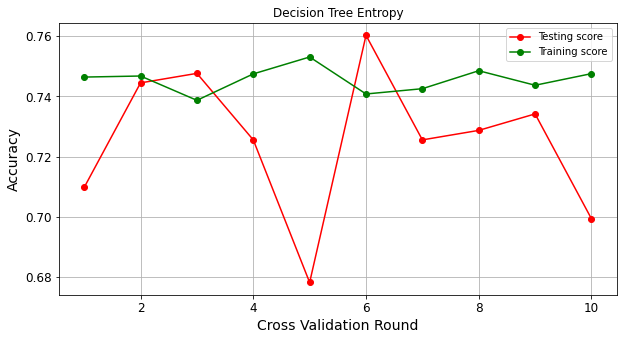

In [100]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Decision Tree Entropy')
ax.set_xlabel("Cross Validation Round")
ax.set_ylabel("Accuracy")
ax.grid()

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

ax.plot(x, accuracy_DT_E, 'o-', color="r", label="Testing score")
ax.plot(x, accuracy_DT_E_Train, 'o-', color="g", label="Training score")
ax.legend(loc="best")

plt.show()

In [88]:
#Decision Tree Gini
print(Average(accuracy_DT_G))

0.7253733578245417


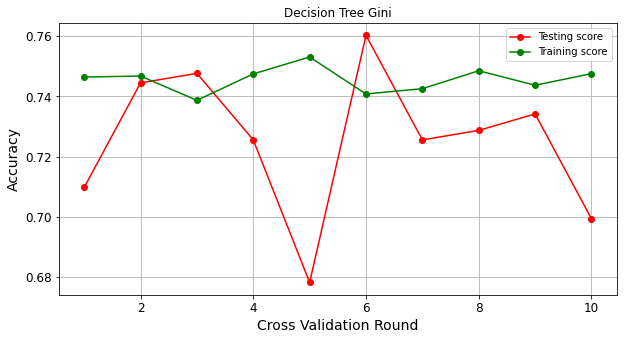

In [101]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Decision Tree Gini')
ax.set_xlabel("Cross Validation Round")
ax.set_ylabel("Accuracy")
ax.grid()

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

ax.plot(x, accuracy_DT_G, 'o-', color="r", label="Testing score")
ax.plot(x, accuracy_DT_G_Train, 'o-', color="g", label="Training score")
ax.legend(loc="best")

plt.show()

In [90]:
#KNN
print(Average(accuracy_KNN))

0.7559996805494549


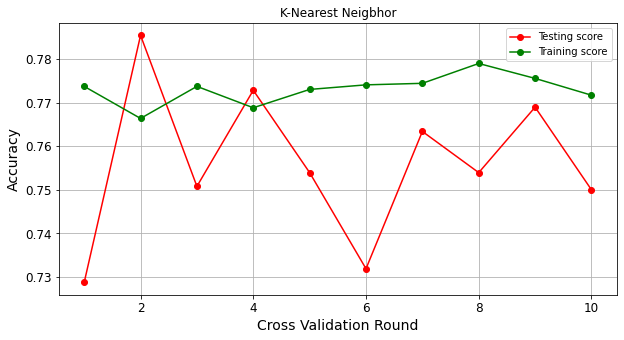

In [91]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('K-Nearest Neigbhor')
ax.set_xlabel("Cross Validation Round")
ax.set_ylabel("Accuracy")
ax.grid()

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

ax.plot(x, accuracy_KNN, 'o-', color="r", label="Testing score")
ax.plot(x, accuracy_KNN_Train, 'o-', color="g", label="Training score")
ax.legend(loc="best")

plt.show()

In [92]:
#Naive Bayes
print(Average(accuracy_NB))

0.7143413329073993


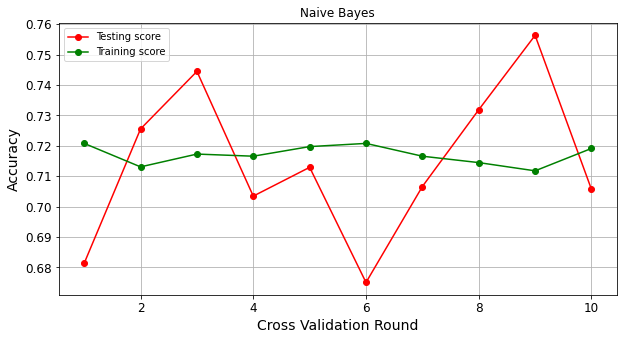

In [93]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Naive Bayes')
ax.set_xlabel("Cross Validation Round")
ax.set_ylabel("Accuracy")
ax.grid()

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

ax.plot(x, accuracy_NB, 'o-', color="r", label="Testing score")
ax.plot(x, accuracy_NB_Train, 'o-', color="g", label="Training score")
ax.legend(loc="best")

plt.show()

### Testing Set 

In [96]:
y_testWhite = y_testWhite.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [97]:
NN_Clf = NeuralNetworkClassifier(X_trainWhite, X_testWhite, y_trainWhite, y_testWhite)
y_predict_NN = NN_Clf.predict(X_testWhite)
AverageTesting.append(NN_Clf.evaluate(X_testWhite, y_testWhite,verbose=1))
AverageUnit.append(Average(NN_Clf.fit(X_trainWhite, y_trainWhite, epochs=100, batch_size=10, verbose=1).history['accuracy']))
    


Train on 3168 samples
Epoch 1/100
3168/3168 [==============================] - 2s 546us/sample - loss: 0.5933 - accuracy: 0.6730
Epoch 2/100
3168/3168 [==============================] - 0s 147us/sample - loss: 0.5063 - accuracy: 0.7459
Epoch 3/100
3168/3168 [==============================] - 0s 148us/sample - loss: 0.4937 - accuracy: 0.7544
Epoch 4/100
3168/3168 [==============================] - 0s 149us/sample - loss: 0.4899 - accuracy: 0.7585
Epoch 5/100
3168/3168 [==============================] - 0s 151us/sample - loss: 0.4873 - accuracy: 0.7601
Epoch 6/100
3168/3168 [==============================] - 0s 148us/sample - loss: 0.4862 - accuracy: 0.7639
Epoch 7/100
3168/3168 [==============================] - 1s 160us/sample - loss: 0.4849 - accuracy: 0.7683
Epoch 8/100
3168/3168 [==============================] - 1s 162us/sample - loss: 0.4829 - accuracy: 0.7667 - loss: 0.4815 - accura
Epoch 9/100
3168/3168 [==============================] - 0s 150us/sample - loss: 0.4814 - accuracy

3168/3168 [==============================] - 0s 151us/sample - loss: 0.4426 - accuracy: 0.7977
Epoch 77/100
3168/3168 [==============================] - 0s 148us/sample - loss: 0.4422 - accuracy: 0.7999
Epoch 78/100
3168/3168 [==============================] - 0s 148us/sample - loss: 0.4419 - accuracy: 0.7951
Epoch 79/100
3168/3168 [==============================] - 0s 149us/sample - loss: 0.4414 - accuracy: 0.7996
Epoch 80/100
3168/3168 [==============================] - 0s 149us/sample - loss: 0.4412 - accuracy: 0.7970
Epoch 81/100
3168/3168 [==============================] - 0s 149us/sample - loss: 0.4409 - accuracy: 0.7926
Epoch 82/100
3168/3168 [==============================] - 0s 148us/sample - loss: 0.4405 - accuracy: 0.7945
Epoch 83/100
3168/3168 [==============================] - 0s 149us/sample - loss: 0.4401 - accuracy: 0.7945
Epoch 84/100
3168/3168 [==============================] - 0s 149us/sample - loss: 0.4399 - accuracy: 0.7980
Epoch 85/100
3168/3168 [=================

793/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 3168 samples
Epoch 1/100
3168/3168 [==============================] - 1s 163us/sample - loss: 0.4349 - accuracy: 0.7958
Epoch 2/100
3168/3168 [==============================] - 0s 152us/sample - loss: 0.4352 - accuracy: 0.7977
Epoch 3/100
3168/3168 [==============================] - 0s 149us/sample - loss: 0.4347 - accuracy: 0.7986
Epoch 4/100
3168/3168 [==============================] - 0s 148us/sample - loss: 0.4346 - accuracy: 0.7989
Epoch 5/100
3168/3168 [==============================] - 0s 148us/sample - loss: 0.4344 - accuracy: 0.7992
Epoch 6/100
3168/3168 [==============================] - 0s 150us/sample - loss: 0.4340 - accuracy: 0.8005
Epoch 7/100
3168/3168 [==============================] - 0s 148us/sample - loss: 0.4336 - accuracy: 0.7967
Epoch 8/100
3168/3168 [==============================] - 0s 149us/sample - loss: 0.4337 - accuracy: 0.7958
Epoch 9/100
3168/3168 [==============================] - 0s 148us/sample - loss: 0.4335 - accuracy: 0.7973
Epoch 10/100
31

3168/3168 [==============================] - 0s 151us/sample - loss: 0.4203 - accuracy: 0.8021
Epoch 77/100
3168/3168 [==============================] - 0s 149us/sample - loss: 0.4205 - accuracy: 0.8027
Epoch 78/100
3168/3168 [==============================] - 0s 149us/sample - loss: 0.4200 - accuracy: 0.7992
Epoch 79/100
3168/3168 [==============================] - 0s 148us/sample - loss: 0.4205 - accuracy: 0.7999
Epoch 80/100
3168/3168 [==============================] - 0s 149us/sample - loss: 0.4206 - accuracy: 0.8027
Epoch 81/100
3168/3168 [==============================] - 0s 149us/sample - loss: 0.4207 - accuracy: 0.7989
Epoch 82/100
3168/3168 [==============================] - 0s 149us/sample - loss: 0.4205 - accuracy: 0.8015
Epoch 83/100
3168/3168 [==============================] - 0s 149us/sample - loss: 0.4199 - accuracy: 0.8008
Epoch 84/100
3168/3168 [==============================] - 0s 148us/sample - loss: 0.4198 - accuracy: 0.8024
Epoch 85/100
3168/3168 [=================

In [98]:
#Neural Network Test
accuracies = []
for loss, accuracy in AverageTesting:
    accuracies.append(accuracy)
Average_accuracy = Average(accuracies)
print(Average_accuracy)

0.7578511563214388
